In [1]:
#Importing required libraries

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.svm import SVR

In [2]:
df=pd.read_csv("database.csv")

In [3]:
df.shape

(9827, 36)

In [4]:
df.head()

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,mie_epsilon,length_scale_factor,...,q_sca,g,c_geo,c_ext,c_abs,c_sca,ssa,mac_total,mac_bc,mac_organics
0,660,1.5,0,15.0,1,15.000000,15.000000,23.829600,2,0.0952,...,0.000389,0.003798,706.858347,0.000083,0.000083,2.750000e-07,0.003318,3.897000,3.897000,0.0
1,660,1.5,0,15.0,2,18.898816,18.898816,33.934547,2,0.0952,...,0.001005,0.008979,1122.067684,0.000173,0.000172,1.130000e-06,0.006529,4.047873,4.047873,0.0
2,660,1.5,0,15.0,4,23.811016,23.811016,48.324498,2,0.0952,...,0.002514,0.022970,1781.171422,0.000362,0.000357,4.480000e-06,0.012376,4.212336,4.212336,0.0
3,660,1.5,0,15.0,6,27.256809,27.256809,59.425643,2,0.0952,...,0.004187,0.037044,2333.994837,0.000550,0.000541,9.770000e-06,0.017756,4.248847,4.248847,0.0
4,660,1.5,0,15.0,8,30.000000,30.000000,68.816510,2,0.0952,...,0.005988,0.051049,2827.433388,0.000745,0.000728,1.690000e-05,0.022730,4.291000,4.291000,0.0


<AxesSubplot:>

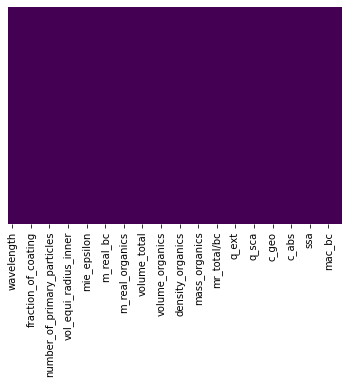

In [5]:
#Check if any null or NaN values in dataset

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<AxesSubplot:>

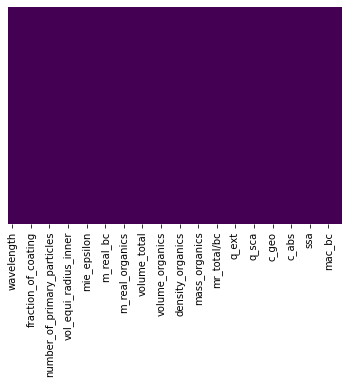

In [6]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')


In [11]:
max(df['q_abs'])

2.1041

Data distribution

In [7]:
#Wavelength

<AxesSubplot:xlabel='wavelength', ylabel='Count'>

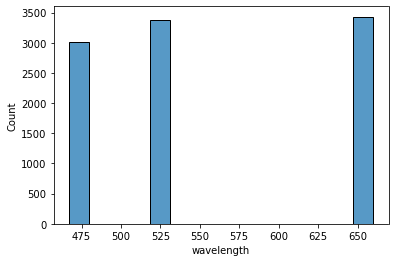

In [8]:
sns.histplot(df['wavelength'])

In [9]:
df['wavelength'].unique()

array([660, 530, 467], dtype=int64)

In [11]:
#Fractal dimension

<AxesSubplot:xlabel='fractal_dimension', ylabel='Count'>

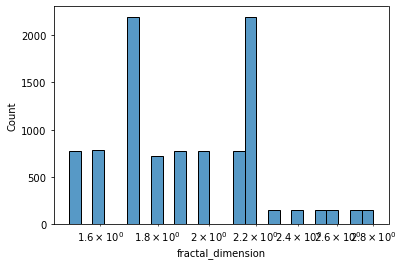

In [12]:
sns.histplot(df['fractal_dimension'], log_scale=True)

In [13]:
df['fractal_dimension'].unique()

array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8])

In [13]:
#Fraction of coating

<AxesSubplot:xlabel='fraction_of_coating', ylabel='Count'>

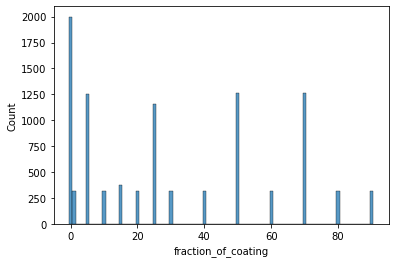

In [14]:
sns.histplot(df['fraction_of_coating'], discrete=True)

In [15]:
df['fraction_of_coating'].unique()

array([ 0,  5, 25, 50, 70,  1, 10, 15, 20, 30, 40, 60, 80, 90],
      dtype=int64)

<AxesSubplot:xlabel='primary_particle_size', ylabel='Count'>

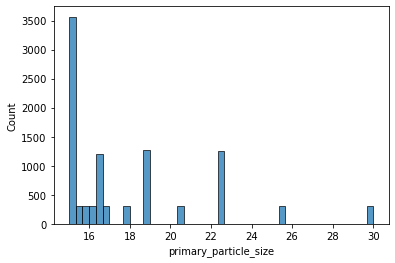

In [17]:
sns.histplot(df['primary_particle_size'])

In [18]:
df['primary_particle_size'].unique()

array([15. , 15.3, 16.5, 18.9, 22.4, 15.1, 15.5, 15.8, 16.2, 16.9, 17.8,
       20.4, 25.6, 30. ])

<AxesSubplot:xlabel='number_of_primary_particles', ylabel='Count'>

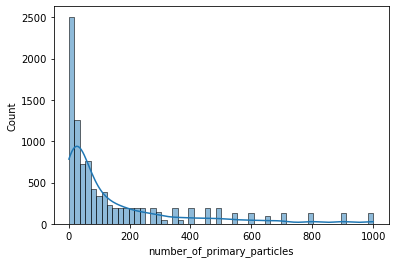

In [19]:
sns.histplot(df['number_of_primary_particles'], kde=True)

In [25]:
df['number_of_primary_particles'].unique()

array([   1,    2,    4,    6,    8,   10,   12,   14,   16,   18,   20,
         24,   28,   32,   36,   40,   46,   52,   58,   62,   68,   72,
         78,   84,   90,  100,  110,  120,  130,  140,  150,  170,  190,
        210,  230,  250,  280,  310,  340,  370,  400,  450,  500,  550,
        600,  700,  800,  900, 1000,    3,    5,    7,    9,   23,   26,
         29,   31,   34,   39,   42,   45,   50,   55,   60,   65,   70,
         75,   85,   95,  105,  115,  125,  155,  185,  200,  225,  275,
        300,  350,  650], dtype=int64)

<AxesSubplot:xlabel='vol_equi_radius_inner', ylabel='Count'>

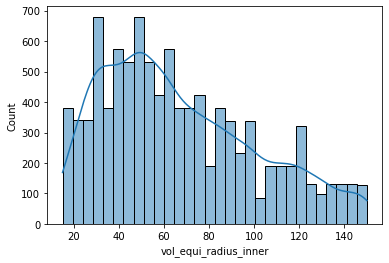

In [20]:
sns.histplot(df['vol_equi_radius_inner'], kde=True)

<AxesSubplot:xlabel='vol_equi_radius_outer', ylabel='Count'>

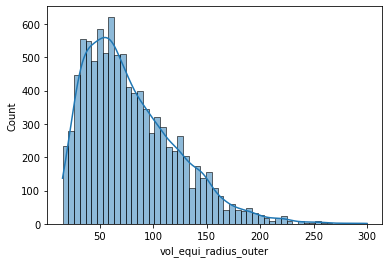

In [21]:
sns.histplot(df['vol_equi_radius_outer'], kde=True)

<AxesSubplot:xlabel='equi_mobility_dia', ylabel='Count'>

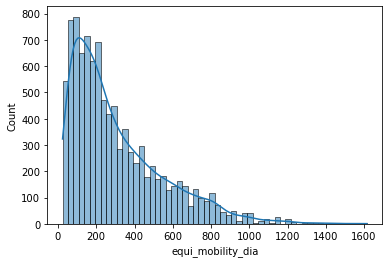

In [22]:
sns.histplot(df['equi_mobility_dia'], kde=True)

In [26]:
df['mie_epsilon'].unique()

array([2], dtype=int64)

Only 1 value -> 2

In [27]:
df['length_scale_factor'].unique()

array([0.09519978, 0.11855067, 0.13454358])

length_scale_factor = 2*pi/wavelength. Dependednt on wavelength feature

<AxesSubplot:xlabel='m_real_bc', ylabel='Count'>

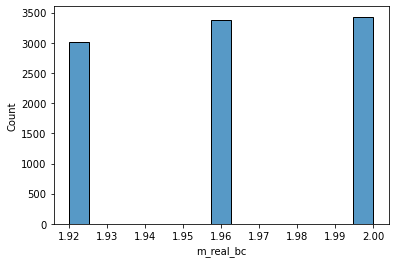

In [28]:
sns.histplot(df['m_real_bc'])

In [29]:
df['m_real_bc'].unique()

array([2.  , 1.96, 1.92])

m_real_bc has only 3 observations as above. Can be considered categorical

<AxesSubplot:xlabel='m_im_bc', ylabel='Count'>

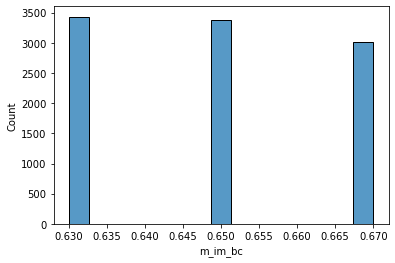

In [30]:
sns.histplot(df['m_im_bc'])

In [31]:
df['m_im_bc'].unique()

array([0.63, 0.65, 0.67])

m_im_bc has only 3 observations as above. Can be considered categorical

<AxesSubplot:xlabel='m_real_organics', ylabel='Count'>

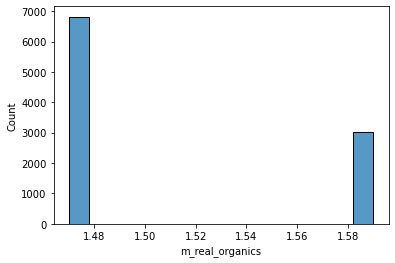

In [28]:
sns.histplot(df['m_real_organics'])

In [29]:
df['m_real_organics'].unique()

array([1.47, 1.59])

m_real_organics has only 2 observations as above. Can be considered categorical

<AxesSubplot:xlabel='m_im_organics', ylabel='Count'>

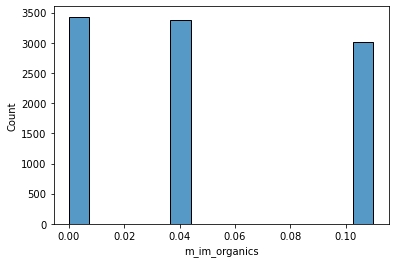

In [30]:
sns.histplot(df['m_im_organics'])

In [31]:
df['m_im_organics'].unique()

array([0.  , 0.04, 0.11])

m_im_organics has only 3 observations as above. Can be considered categorical

<AxesSubplot:xlabel='volume_total', ylabel='Count'>

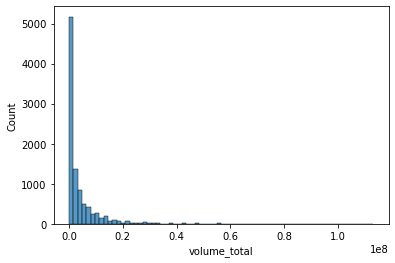

In [32]:
sns.histplot(df['volume_total'], bins= 70)

<AxesSubplot:xlabel='volume_bc', ylabel='Count'>

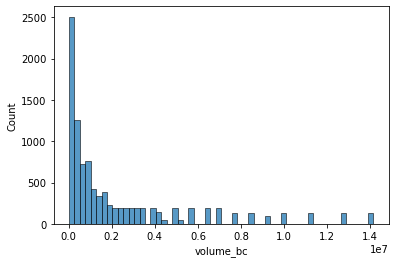

In [33]:
sns.histplot(df['volume_bc'])

<AxesSubplot:xlabel='volume_organics', ylabel='Count'>

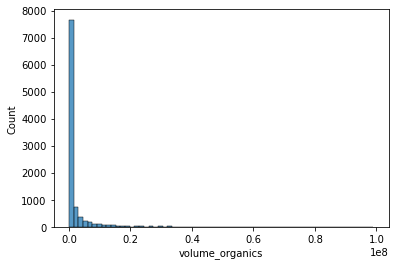

In [34]:
sns.histplot(df['volume_organics'], bins=65)

Density=Mass/Volume

In [35]:
df['density_bc'].unique()

array([1.5])

In [36]:
df['density_organics'].unique()

array([1.1])

<AxesSubplot:xlabel='mass_total', ylabel='Count'>

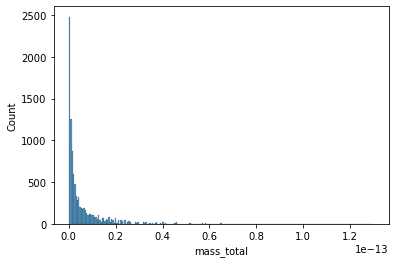

In [37]:
sns.histplot(df['mass_total'])

<AxesSubplot:xlabel='mass_bc', ylabel='Count'>

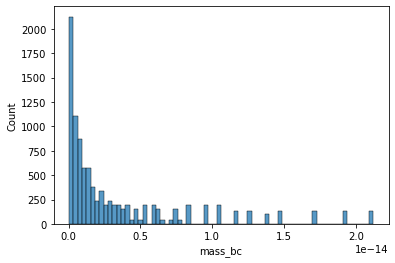

In [38]:
sns.histplot(df['mass_bc'], bins=70)

<AxesSubplot:xlabel='mass_organics', ylabel='Count'>

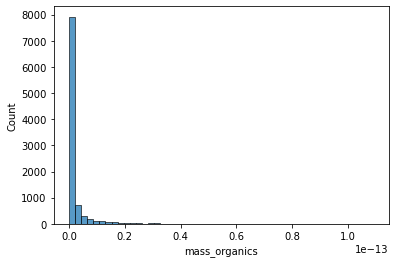

In [39]:
sns.histplot(df['mass_organics'], bins=50)

<AxesSubplot:xlabel='mr_total/bc', ylabel='Count'>

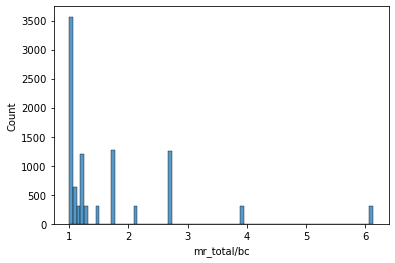

In [40]:
sns.histplot(df['mr_total/bc'])

In [41]:
df['mr_total/bc'].unique()

array([1.        , 1.04488587, 1.24273333, 1.73360907, 2.70881312,
       1.01476466, 1.07580494, 1.12370236, 1.19045547, 1.31545479,
       1.49209426, 2.1113344 , 3.91208644, 6.13333333])

<AxesSubplot:xlabel='mr_nonBC/BC', ylabel='Count'>

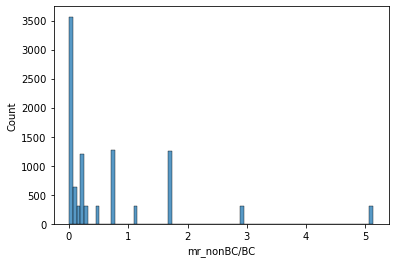

In [42]:
sns.histplot(df['mr_nonBC/BC'])

In [43]:
df['mr_nonBC/BC'].unique()

array([0.        , 0.04488587, 0.24273333, 0.73360907, 1.70881312,
       0.01476466, 0.07580494, 0.12370236, 0.19045547, 0.3154548 ,
       0.49209426, 1.1113344 , 2.91208644, 5.13333333])

In [44]:
#Optical properties

<AxesSubplot:xlabel='q_ext', ylabel='Count'>

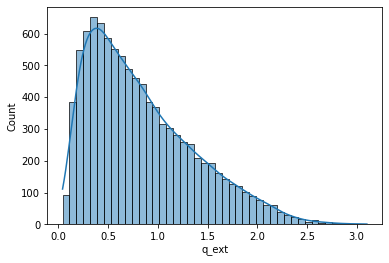

In [32]:
sns.histplot(df['q_ext'], kde=True)

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

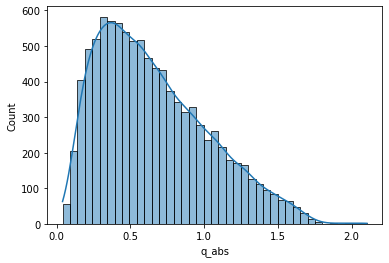

In [33]:
sns.histplot(df['q_abs'], kde=True)

<AxesSubplot:xlabel='q_sca', ylabel='Count'>

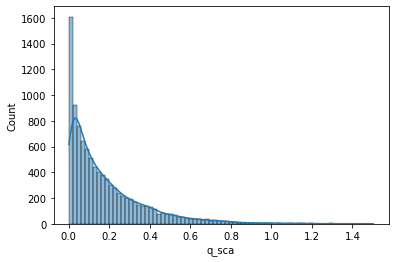

In [34]:
sns.histplot(df['q_sca'], kde=True)

<AxesSubplot:xlabel='g', ylabel='Count'>

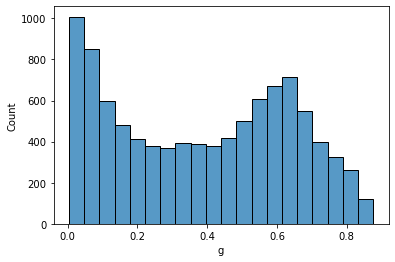

In [35]:
sns.histplot(df['g'])

<AxesSubplot:xlabel='c_geo', ylabel='Count'>

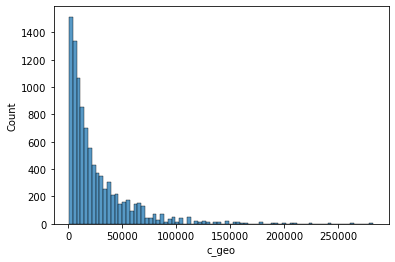

In [36]:
sns.histplot(df['c_geo'], bins=80)

<AxesSubplot:xlabel='c_ext', ylabel='Count'>

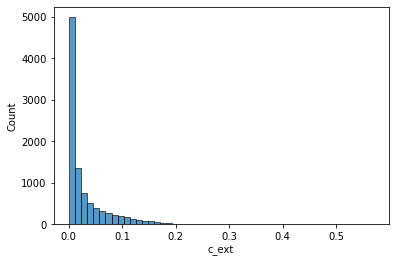

In [37]:
sns.histplot(df['c_ext'], bins=50)

<AxesSubplot:xlabel='c_abs', ylabel='Count'>

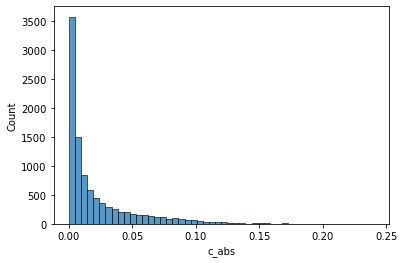

In [38]:
sns.histplot(df['c_abs'], bins=50)

<AxesSubplot:xlabel='ssa', ylabel='Count'>

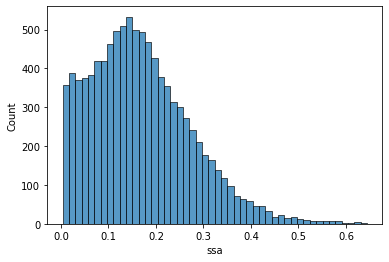

In [39]:
sns.histplot(df['ssa'])

<AxesSubplot:xlabel='mac_total', ylabel='Count'>

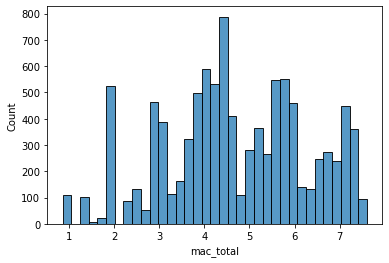

In [40]:
sns.histplot(df['mac_total'])

<AxesSubplot:xlabel='mac_bc', ylabel='Count'>

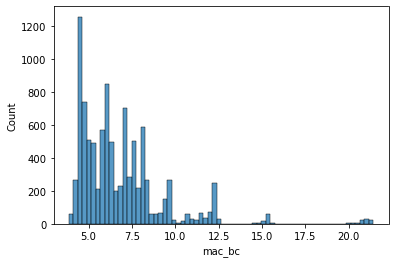

In [54]:
sns.histplot(df['mac_bc'])

<AxesSubplot:xlabel='mac_organics', ylabel='Count'>

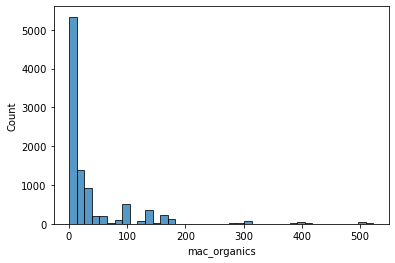

In [55]:
sns.histplot(df['mac_organics'], bins=40)

Checking correlation between features

In [ ]:
sns.pairplot(df)

KeyboardInterrupt: 

In [ ]:
sns.pairplot(df, vars=['q_ext', 'q_abs', 'q_sca', 'g', 'c_geo', 'c_ext', 'c_abs','c_sca', 'ssa', 'mac_total', 'mac_bc','mac_organics'], palette="deep")

In [ ]:
sns.pairplot(df, vars=['q_ext', 'q_abs', 'q_sca'], hue="wavelength", palette="deep")

In [ ]:
sns.pairplot(df, vars=[ 'c_geo', 'c_ext', 'c_abs','c_sca'], hue="wavelength", palette="deep")

In [ ]:
sns.pairplot(df, vars=[ 'mac_total', 'mac_bc','mac_organics'], hue="wavelength", palette="deep")

In [ ]:
sns.scatterplot(data=df, x="fractal_dimension", y="c_abs", hue="wavelength", palette="deep")

In [ ]:
sns.scatterplot(data=df, x="fractal_dimension", y="c_sca", hue="wavelength", palette="deep")

In [ ]:
sns.scatterplot(data=df, x="fractal_dimension", y="g", hue="wavelength", palette="deep")

In [ ]:
sns.scatterplot(data=df, x="fractal_dimension", y="ssa", hue="wavelength", palette="deep")

In [ ]:
sns.scatterplot(data=df, x="equi_mobility_dia", y="c_abs", hue="wavelength", palette="deep")

In [ ]:
#Checking formulae as in paper

import math



In [ ]:

c_geo=math.pi*(df['vol_equi_radius_inner'])**2

In [ ]:
c_geo.unique()

In [ ]:
df['c_geo'].unique()

In [ ]:
c_ext=df['q_ext']*df["c_geo"]

In [ ]:
c_ext.unique()

In [15]:
df['c_ext'].unique()

array([8.29000000e-05, 1.72798000e-04, 3.61792000e-04, ...,
       9.94159750e-02, 1.12381069e-01, 1.25113934e-01])

In [16]:
q_ext=df['q_sca']+df['q_abs']

In [17]:
q_ext.unique()

array([0.11729915, 0.1540054 , 0.2031138 , ..., 2.5907    , 2.7074    ,
       2.8097    ])

In [18]:
df['q_ext'].unique()

array([0.1173 , 0.154  , 0.20312, ..., 2.5907 , 2.7074 , 2.8097 ])

In [19]:
mac_bc=df['c_abs']/df['mass_bc']
mac_total=df['c_abs']/df['mass_total']


<AxesSubplot:xlabel='mac_total', ylabel='Count'>

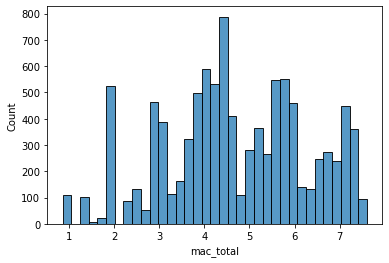

In [20]:
sns.histplot(df['mac_total'])

<AxesSubplot:ylabel='Count'>

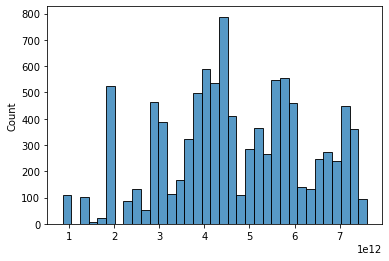

In [21]:
sns.histplot(mac_total)

<AxesSubplot:xlabel='mac_bc', ylabel='Count'>

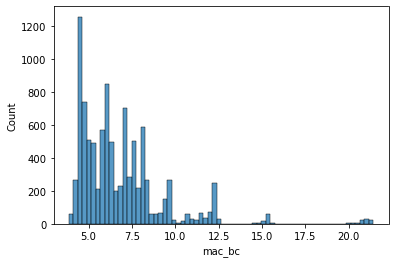

In [22]:
sns.histplot(df['mac_bc'])

<AxesSubplot:ylabel='Count'>

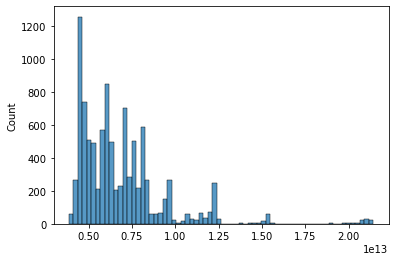

In [23]:
sns.histplot(mac_bc)

In [24]:
total_absorption_cross_section= df['c_abs']*df['number_of_primary_particles']

<AxesSubplot:ylabel='Count'>

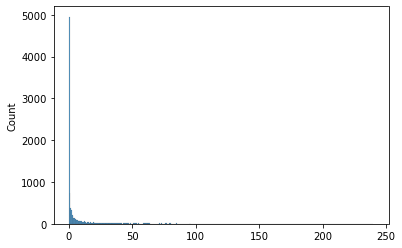

In [25]:
sns.histplot(total_absorption_cross_section)

<AxesSubplot:xlabel='mac_total', ylabel='Count'>

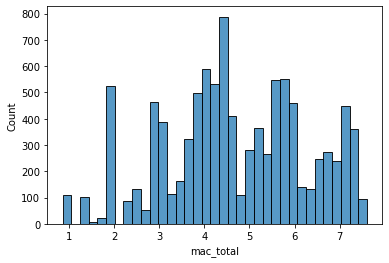

In [26]:
sns.histplot(df['mac_total'])

In [27]:
volume_equivalent_radius=df['primary_particle_size']*(df['number_of_primary_particles']**(1/3))

<AxesSubplot:ylabel='Count'>

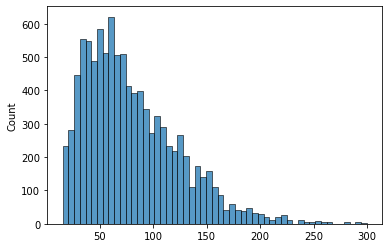

In [28]:
sns.histplot(volume_equivalent_radius)

<AxesSubplot:xlabel='vol_equi_radius_inner', ylabel='Count'>

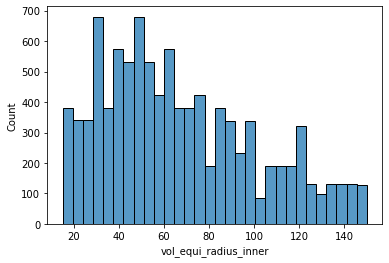

In [29]:
sns.histplot(df['vol_equi_radius_inner'])

<AxesSubplot:xlabel='vol_equi_radius_outer', ylabel='Count'>

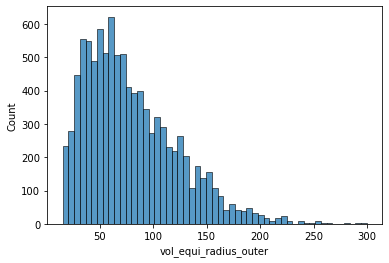

In [30]:
sns.histplot(df['vol_equi_radius_outer'])

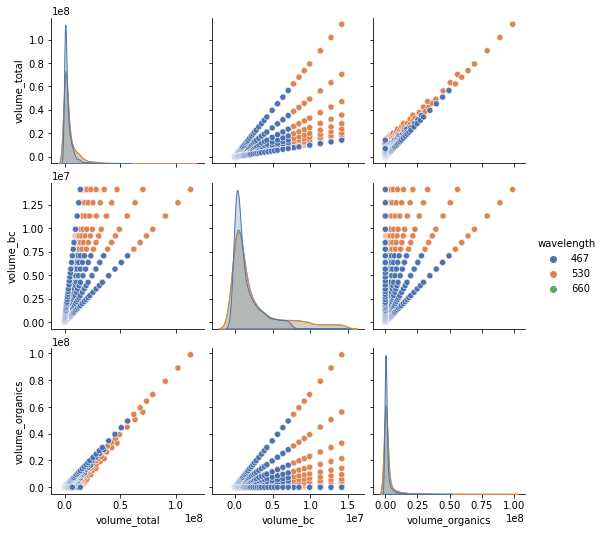

In [7]:
sns.pairplot(df, vars=['volume_total', 'volume_bc', 'volume_organics'], hue="wavelength", palette="deep")

In [13]:

index = pd.Index(df['fractal_dimension'])
index.value_counts()

2.2     2195
1.7     2145
1.6      779
2.1      773
2.0      773
1.9      770
1.5      767
1.8      724
2.7      141
2.4      141
2.6      141
2.3      141
2.5      141
2.8       92
11.7      55
22.8      49
Name: fractal_dimension, dtype: int64

In [14]:
index = pd.Index(df['fraction_of_coating'])
index.value_counts()

0     1998
50    1264
70    1261
5     1252
25    1154
15     371
30     316
60     316
20     316
10     316
1      316
80     316
40     316
90     315
Name: fraction_of_coating, dtype: int64

In [8]:
index = pd.Index(df['wavelength'])
index.value_counts()

660    3432
530    3381
467    3014
Name: wavelength, dtype: int64

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,mie_epsilon,length_scale_factor,...,q_sca,g,c_geo,c_ext,c_abs,c_sca,ssa,mac_total,mac_bc,mac_organics


In [9]:
#Check formulaes

In [105]:
q_ext=df["q_abs"]+df["q_sca"]

<AxesSubplot:xlabel='q_ext', ylabel='Count'>

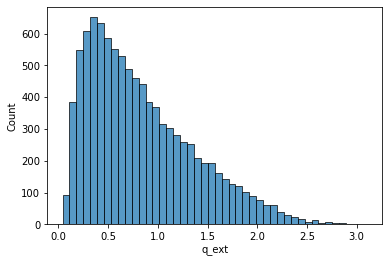

In [106]:
sns.histplot(df['q_ext'])

<AxesSubplot:ylabel='Count'>

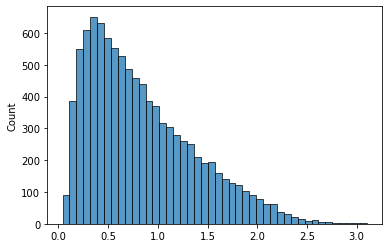

In [107]:
sns.histplot(q_ext)

In [3]:
import math

In [4]:
c_geo=(math.pi)*(df['vol_equi_radius_outer']**2)

<AxesSubplot:xlabel='vol_equi_radius_outer', ylabel='Count'>

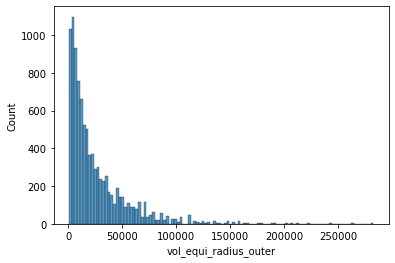

In [5]:
sns.histplot(c_geo)


<AxesSubplot:xlabel='c_geo', ylabel='Count'>

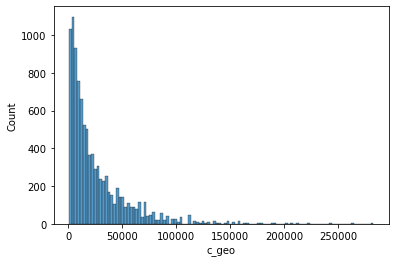

In [6]:
sns.histplot(df['c_geo'])

In [7]:
c_ext= (df['q_ext']*df['c_geo'])/(float(1000000))

<AxesSubplot:xlabel='c_ext', ylabel='Count'>

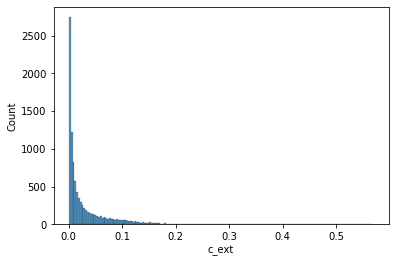

In [8]:
sns.histplot(df['c_ext'])

<AxesSubplot:ylabel='Count'>

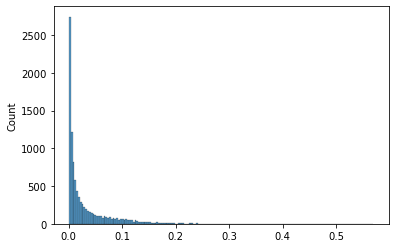

In [9]:
sns.histplot(c_ext)

In [10]:
c_abs= df['q_abs']*df['c_geo']/(1000000)

<AxesSubplot:xlabel='c_abs', ylabel='Count'>

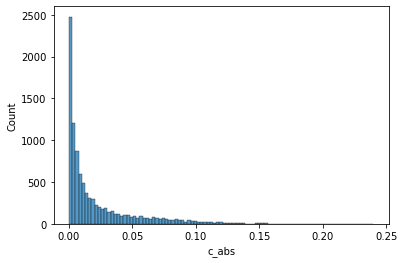

In [11]:
sns.histplot(df['c_abs'])

<AxesSubplot:ylabel='Count'>

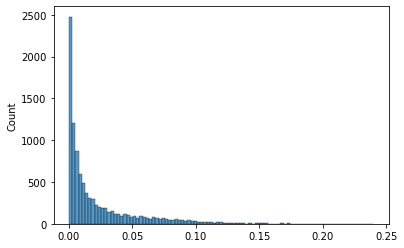

In [12]:
sns.histplot(c_abs)

In [13]:
c_sca= df['q_sca']*df['c_geo']/(1000000)

<AxesSubplot:ylabel='Count'>

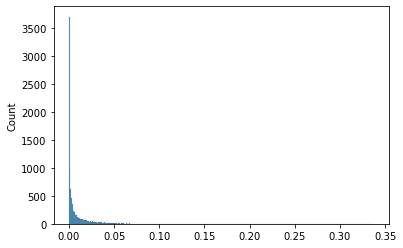

In [14]:
sns.histplot(c_sca)

<AxesSubplot:xlabel='c_sca', ylabel='Count'>

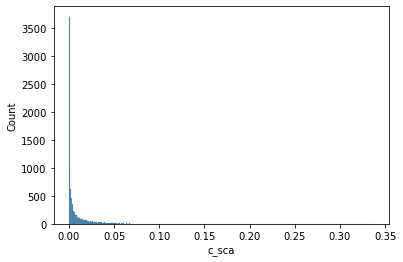

In [15]:
sns.histplot(df['c_sca'])

In [16]:
ssa=df['q_sca']/df['q_ext']

<AxesSubplot:xlabel='ssa', ylabel='Count'>

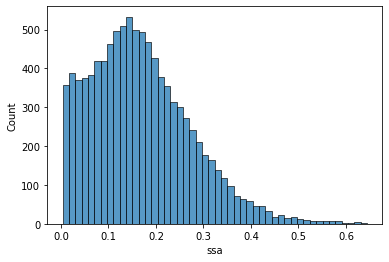

In [17]:
sns.histplot(df['ssa'])

<AxesSubplot:ylabel='Count'>

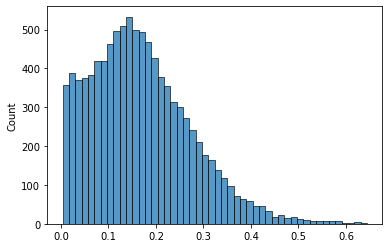

In [18]:
sns.histplot(ssa)

In [47]:
mac_total=(df['c_abs']*1000000000)/(df['mass_total'])

<AxesSubplot:ylabel='Count'>

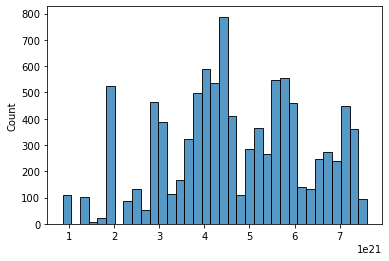

In [48]:
sns.histplot(mac_total)

<AxesSubplot:xlabel='mac_total', ylabel='Count'>

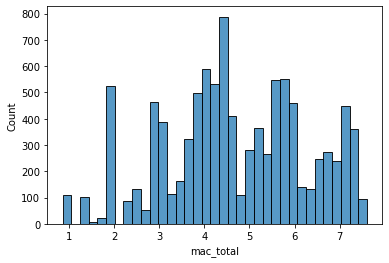

In [49]:
sns.histplot(df['mac_total'])

In [50]:
mac_total=(df['c_abs'])/(df['mass_total']*1000000000000)

<AxesSubplot:ylabel='Count'>

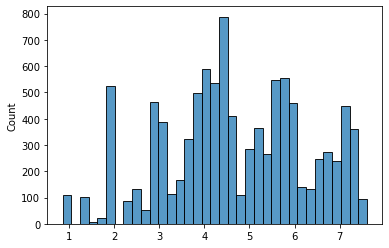

In [51]:
sns.histplot(mac_total)

<AxesSubplot:xlabel='mac_total', ylabel='Count'>

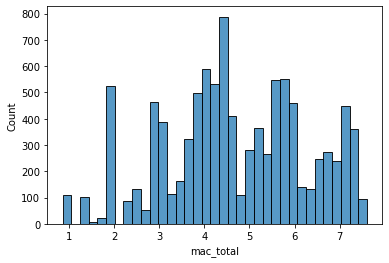

In [52]:
sns.histplot(df['mac_total'])

In [39]:
mac_bc=df['c_abs']/(df['mass_bc']*(1000000000000))

<AxesSubplot:ylabel='Count'>

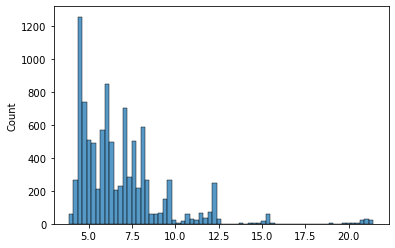

In [40]:
sns.histplot(mac_bc)

<AxesSubplot:xlabel='mac_bc', ylabel='Count'>

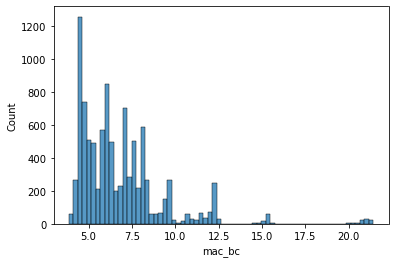

In [41]:
sns.histplot(df['mac_bc'])

In [7]:
#train set leaving fractal dimesnion =2.2 out

In [8]:
train_set=df[(df['fractal_dimension']<=2.1) | (df['fractal_dimension']>2.2)]
test_set=df[df['fractal_dimension']==2.2]
test_set.shape

(2195, 36)

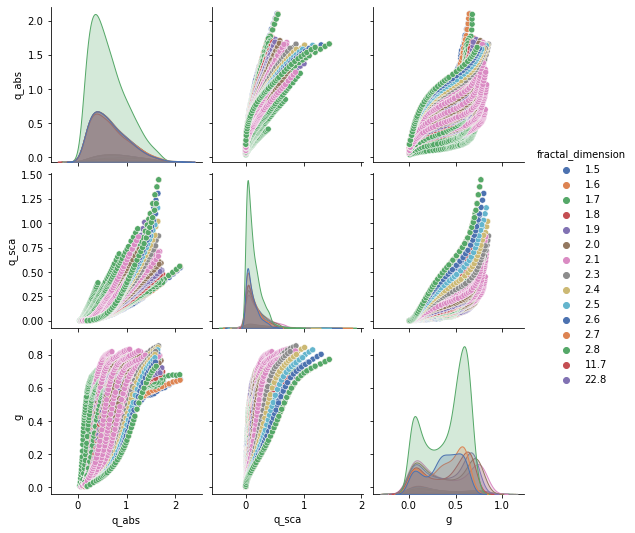

In [9]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep")

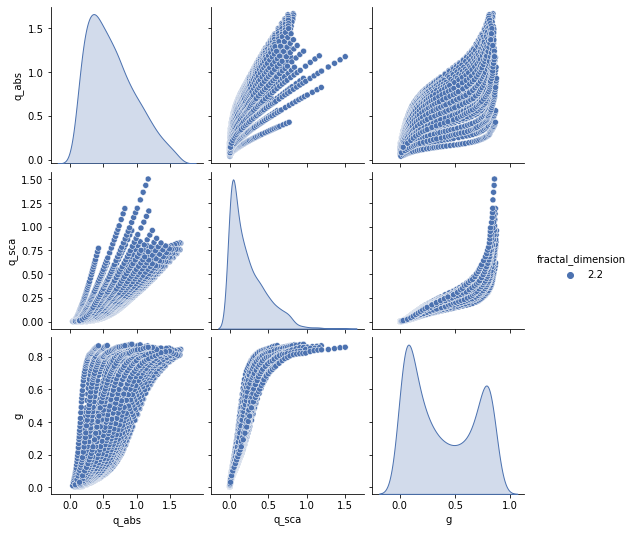

In [10]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep")

In [7]:
#train set leaving fractal dimesnion =2.2, 2.1 out

In [17]:
train_set=df[(df['fractal_dimension']<2.1) | (df['fractal_dimension']>2.2)]
test_set=df[(df['fractal_dimension']==2.1) | (df['fractal_dimension']==2.2)]
test_set.shape

(2968, 36)

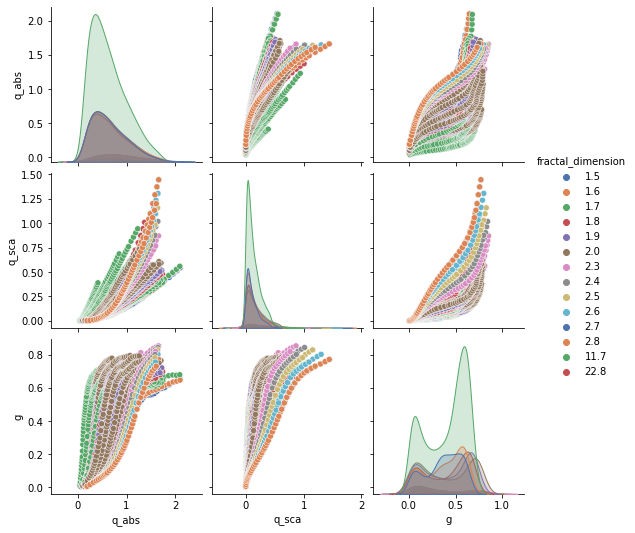

In [18]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep")

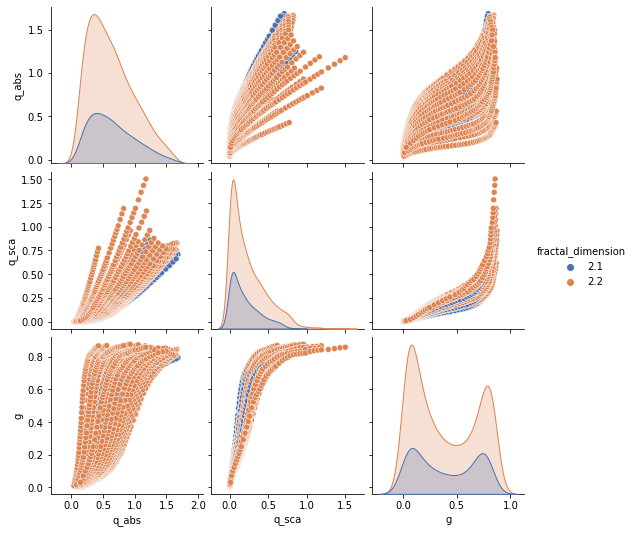

In [23]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep")